In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [12]:
# Imports the patient dataset and drops unneccessary rows/columns
df = pd.read_excel('Data/ALL_PMS_Patient_Biolog_data_NORMALIZED.xlsx', sheet_name='PM-M8')
df = df[1:]
df.columns = df.iloc[0]
df = df[1:]
df = df.drop('well', axis=1)
dfNames = df['CMS#']
df = df.drop('CMS#', axis=1)

In [14]:
# Imports the control dataset and drops unneccessary rows/columns
df_control = pd.read_excel('Data/ABS_Normalized Control_PMS data.xlsx', sheet_name='PM-M8_Control')
df_control = df_control[4:]

# Removes the first 59 columns, which were raw data
cols = df_control.columns.tolist()
to_remove = cols[0:59] + cols[109:]
df_control = df_control.loc[:, ~df_control.columns.isin(to_remove)]

In [15]:
#Converts the dataframes to NumPy arrays
arrayControl = df_control.to_numpy()
arrayPatient = df.to_numpy()
print(arrayControl.shape)
print(arrayPatient.shape)

(96, 50)
(96, 48)


C:\Users\yashj\AppData\Local\Temp\ipykernel_13732\670622307.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


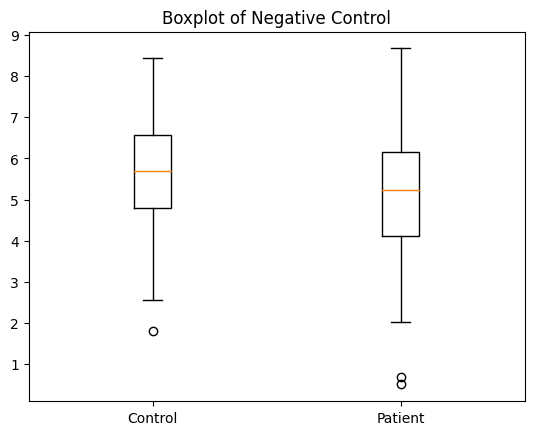

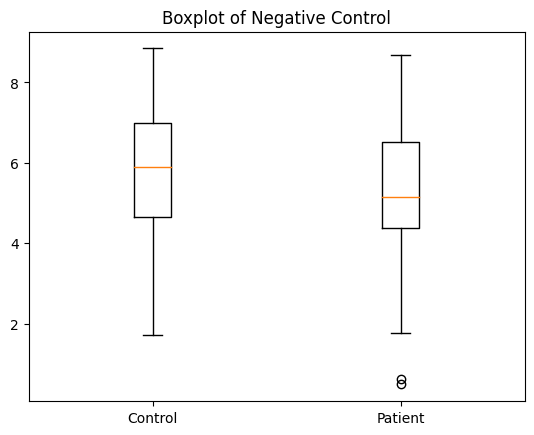

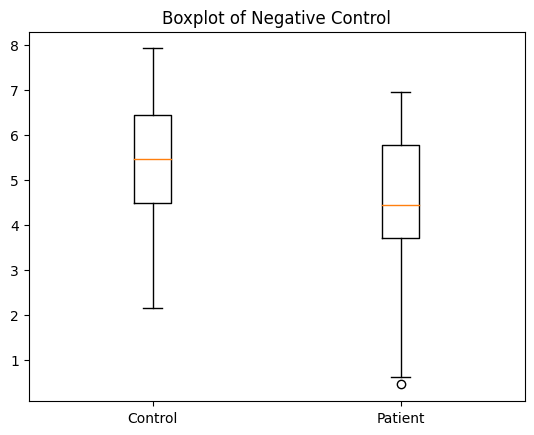

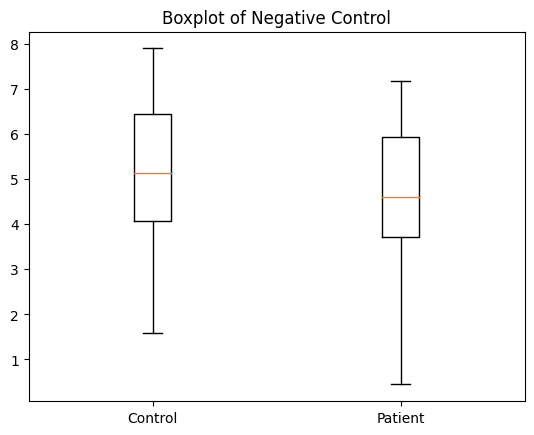

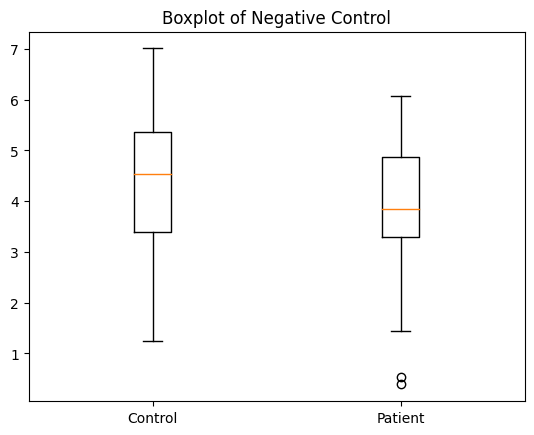

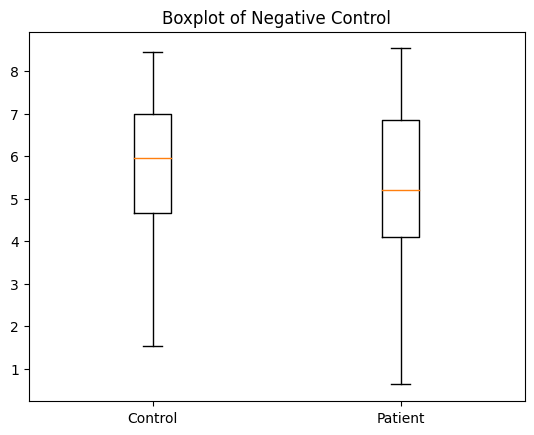

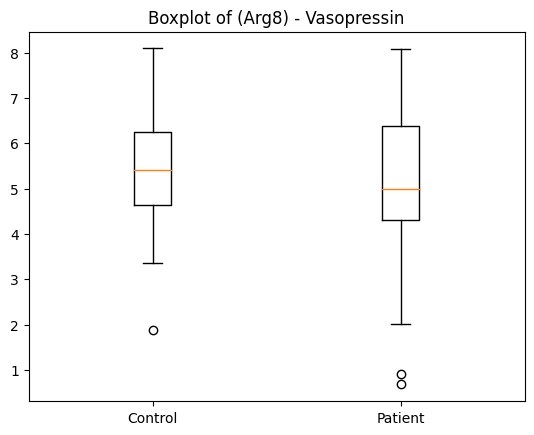

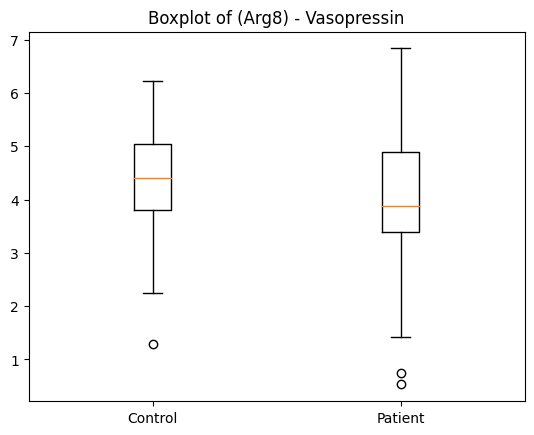

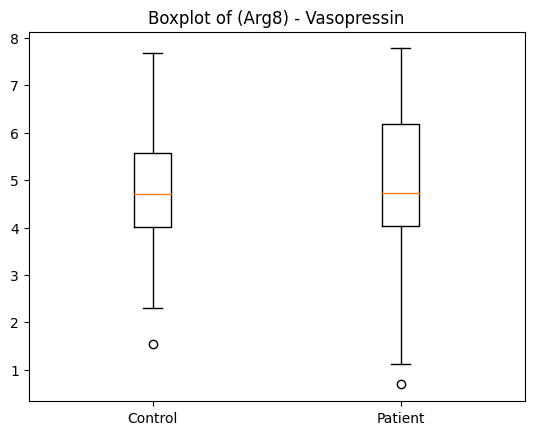

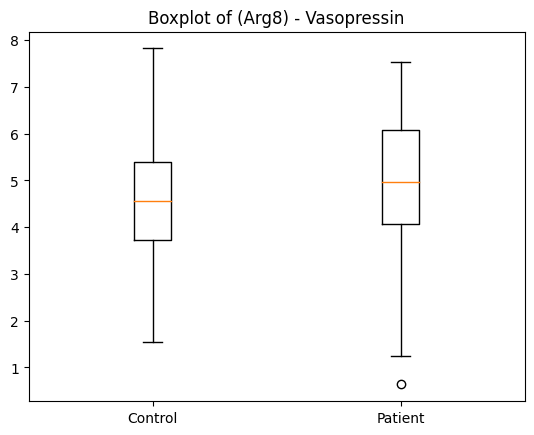

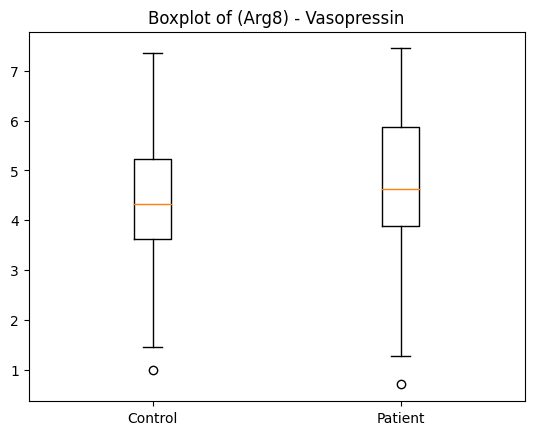

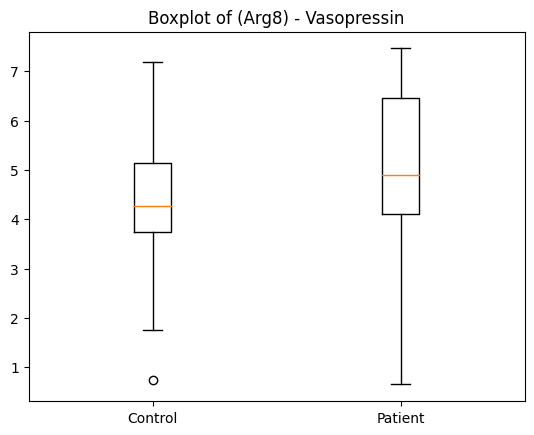

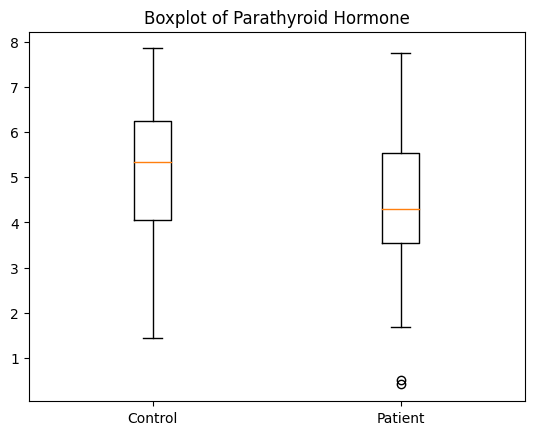

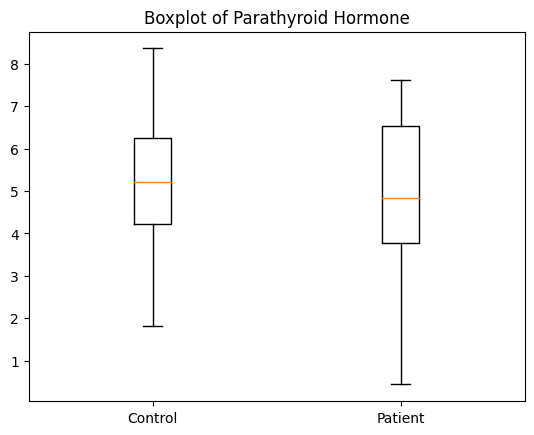

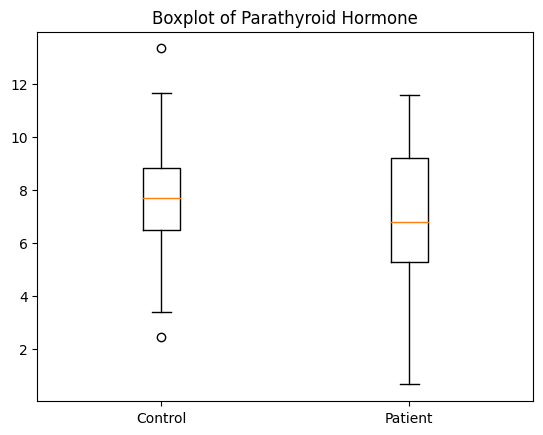

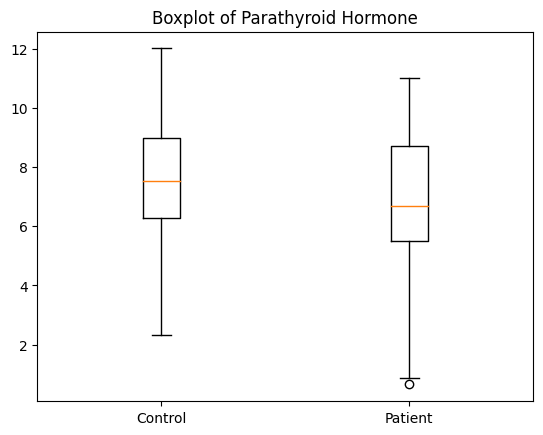

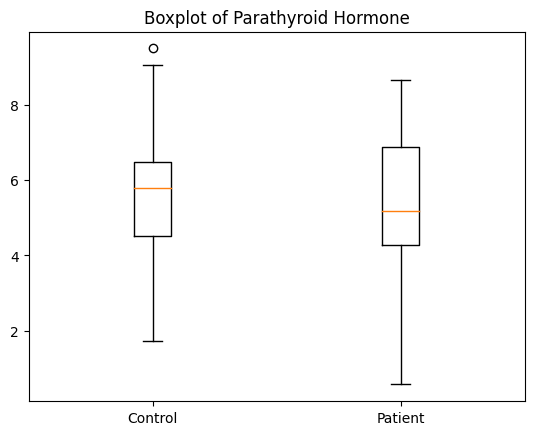

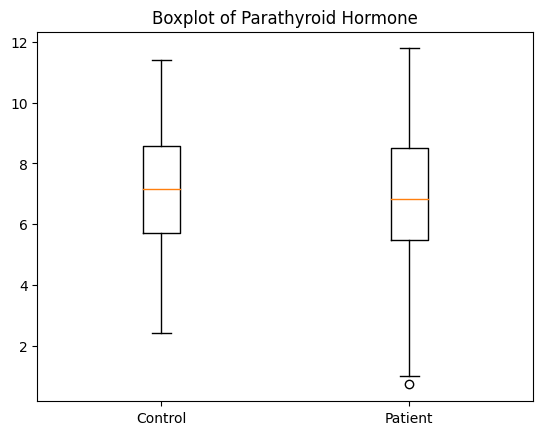

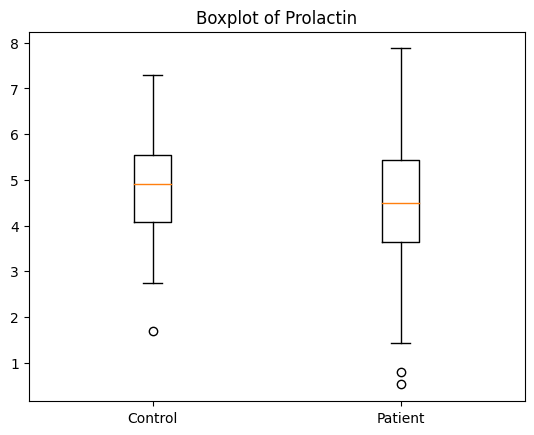

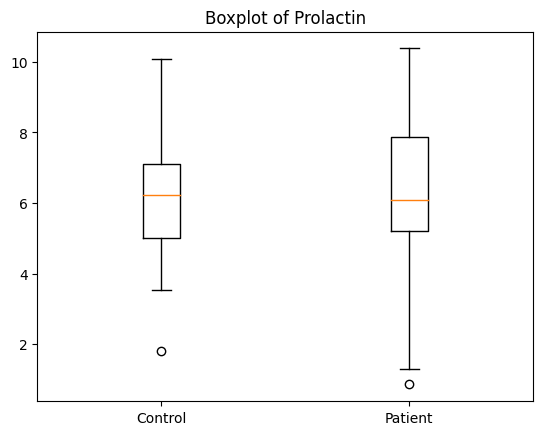

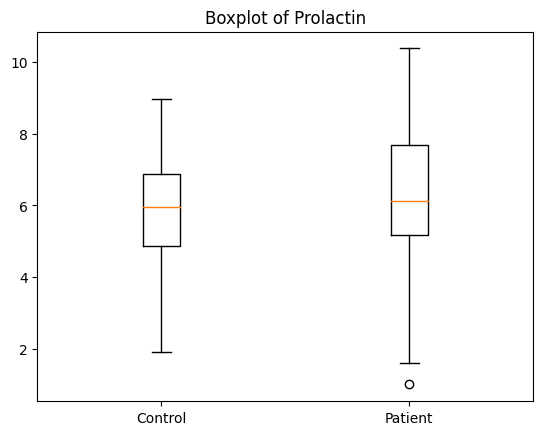

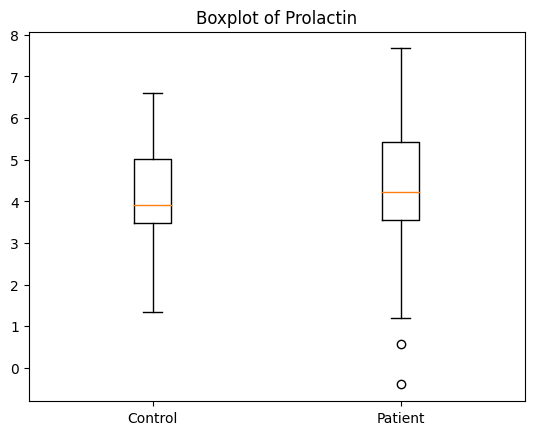

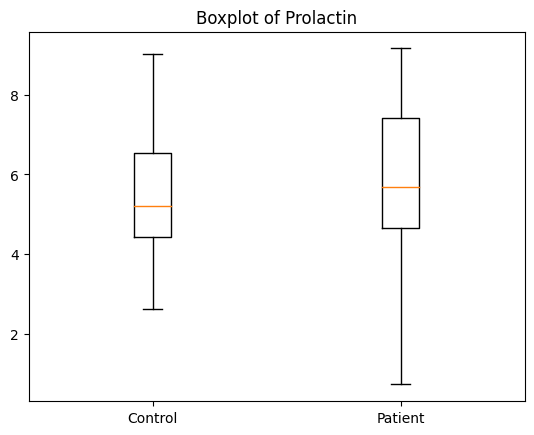

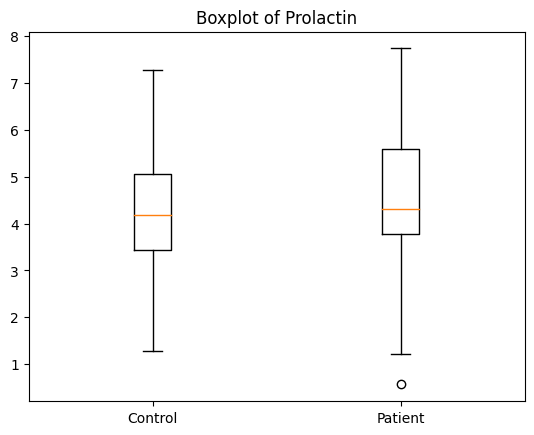

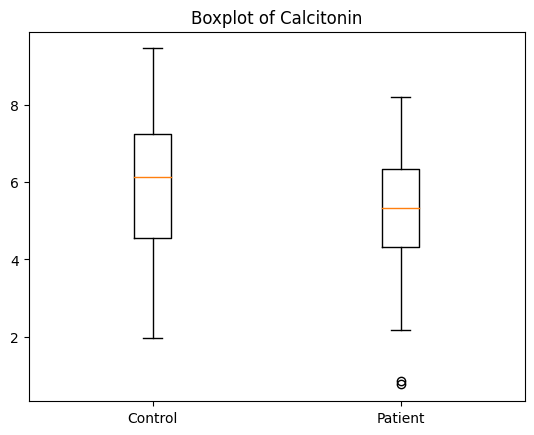

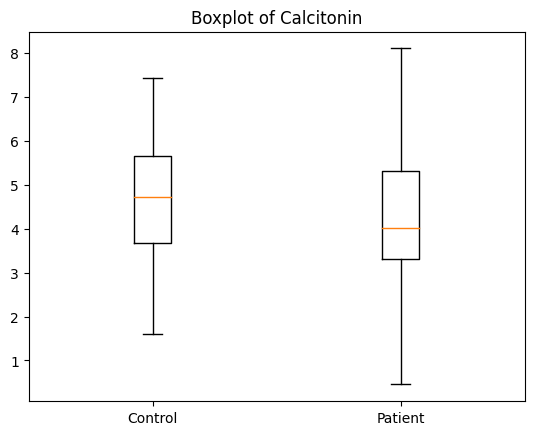

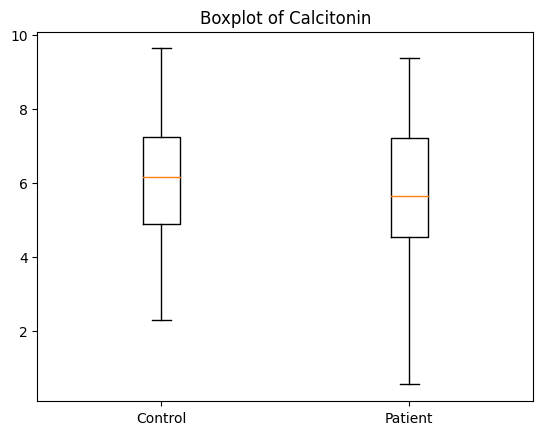

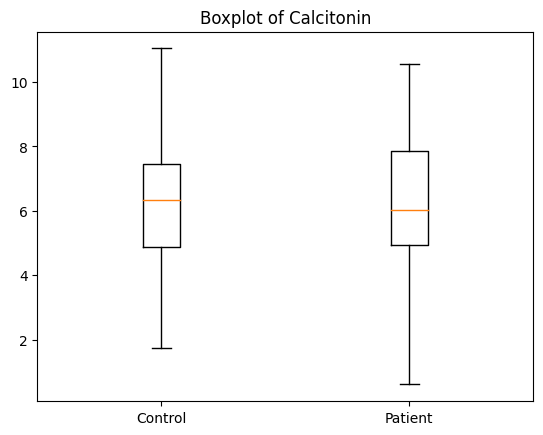

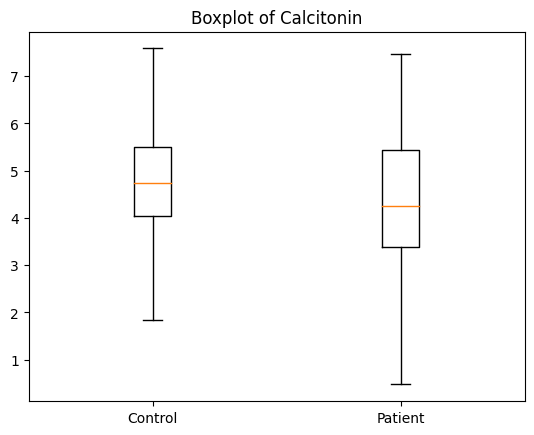

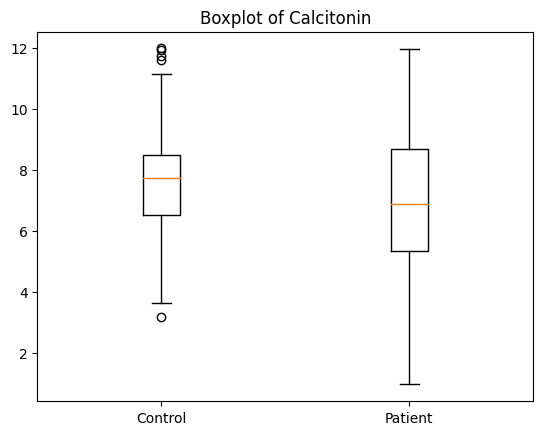

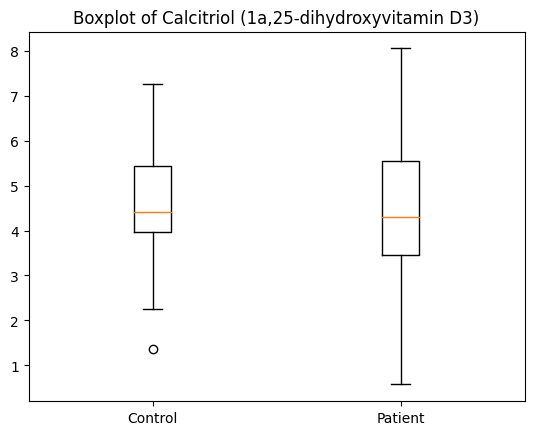

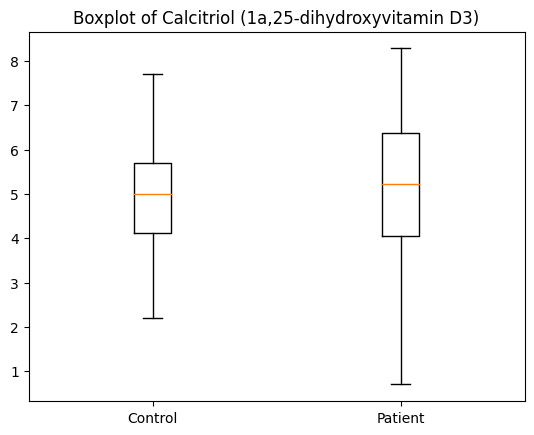

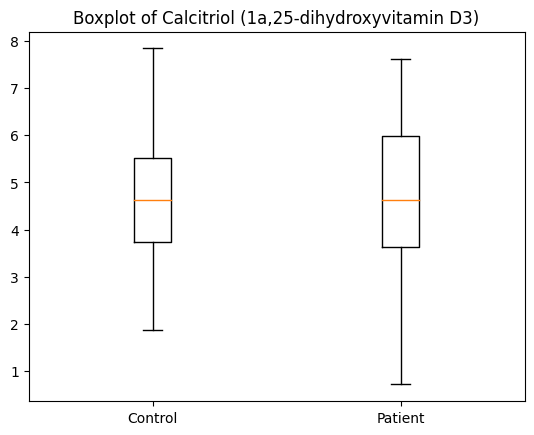

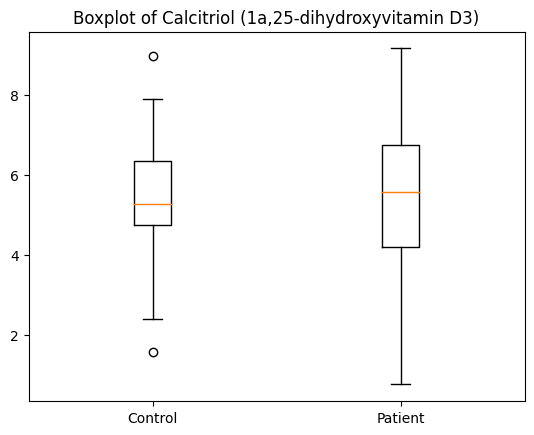

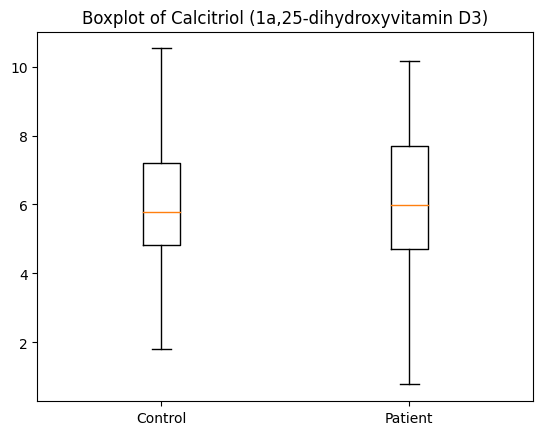

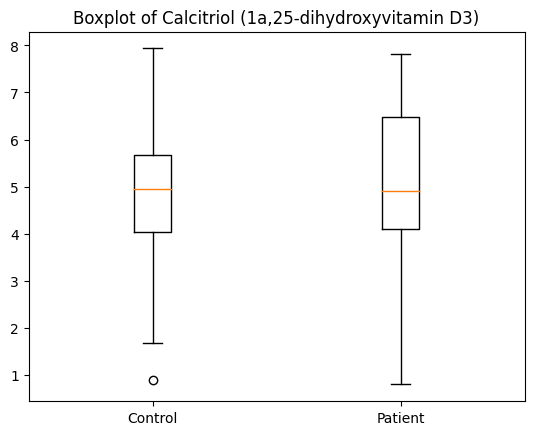

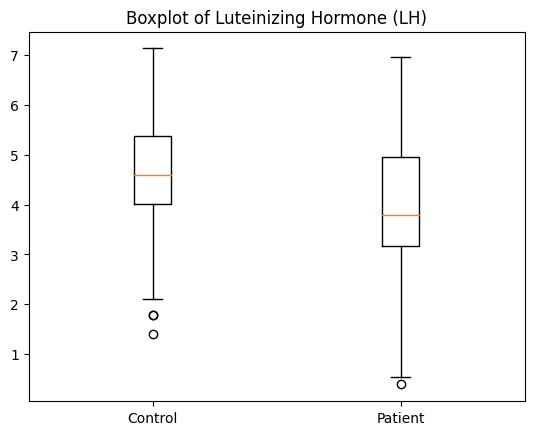

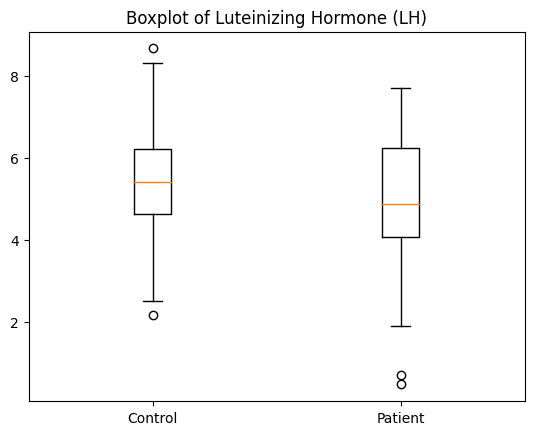

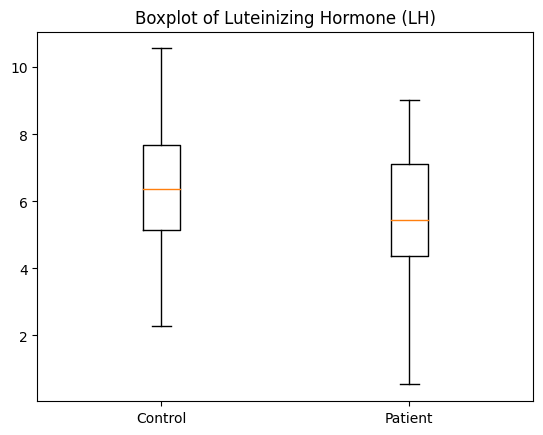

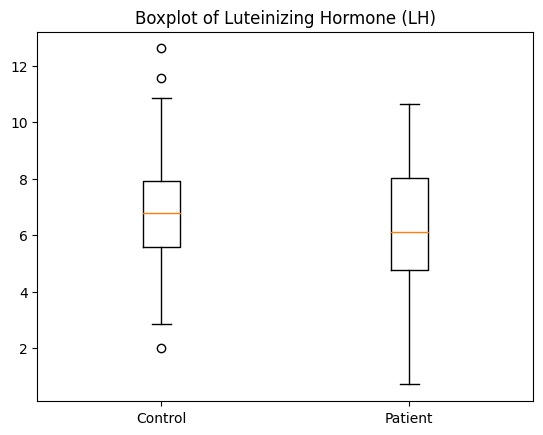

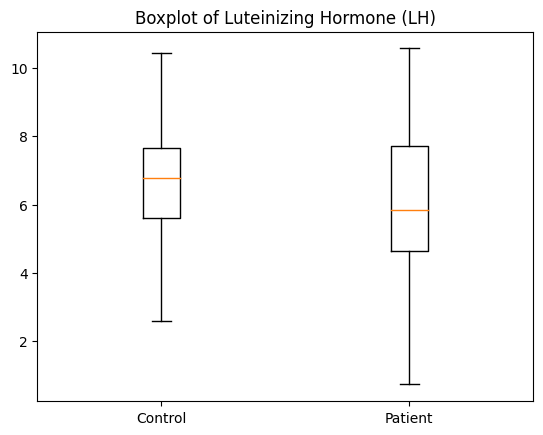

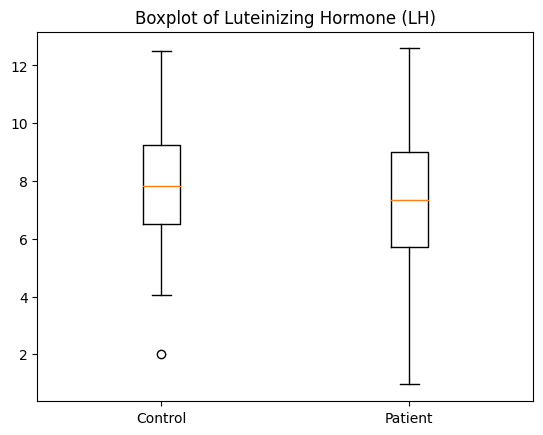

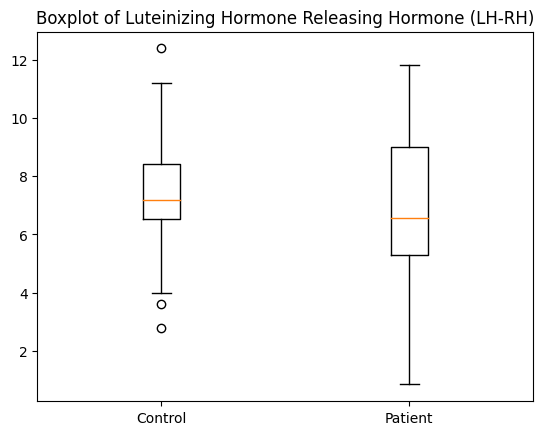

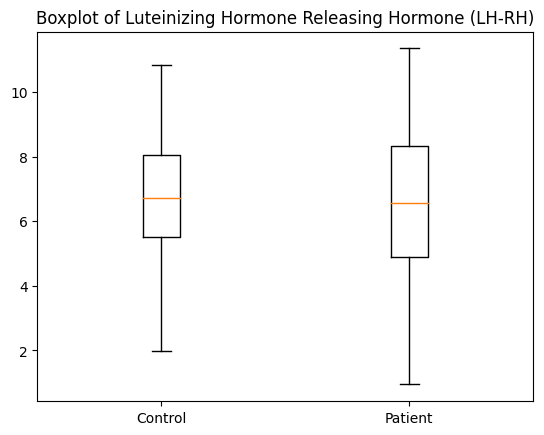

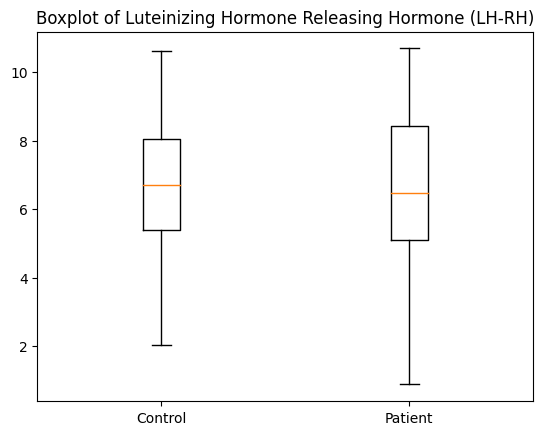

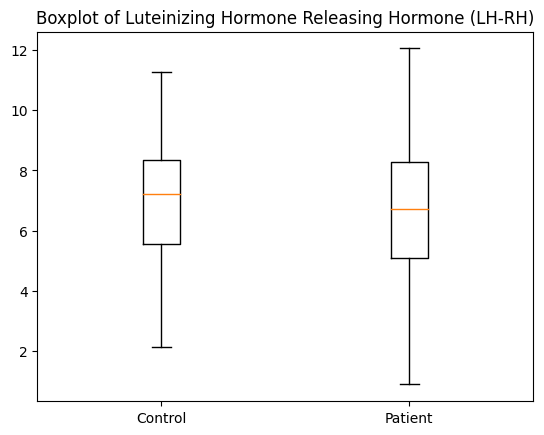

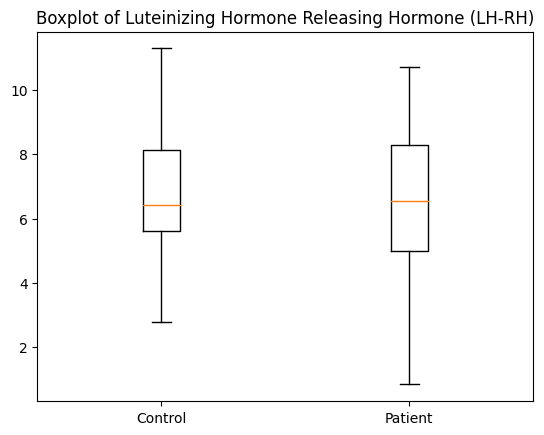

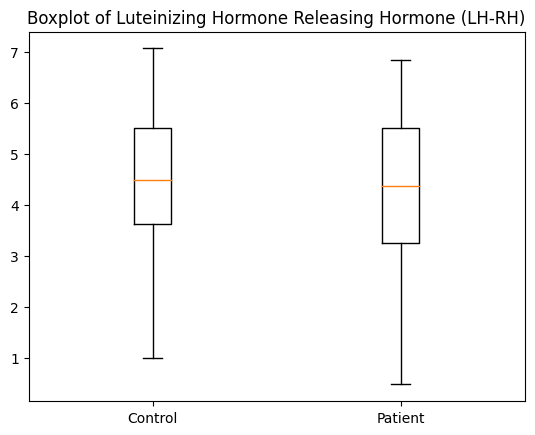

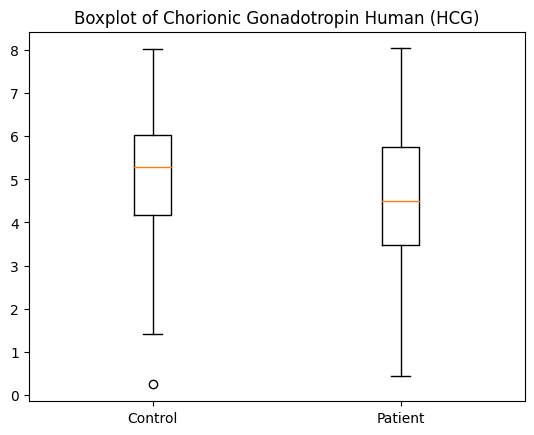

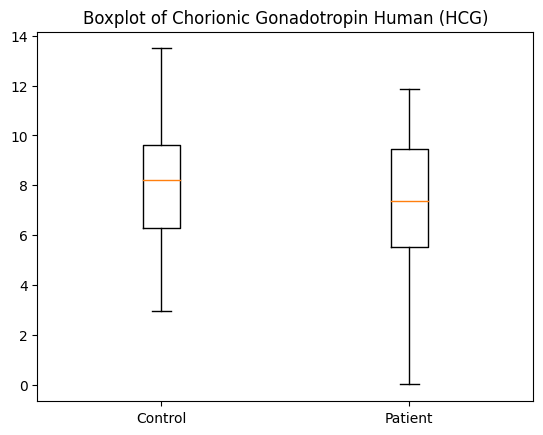

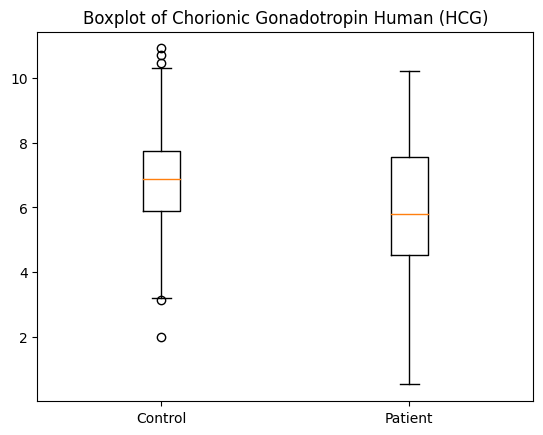

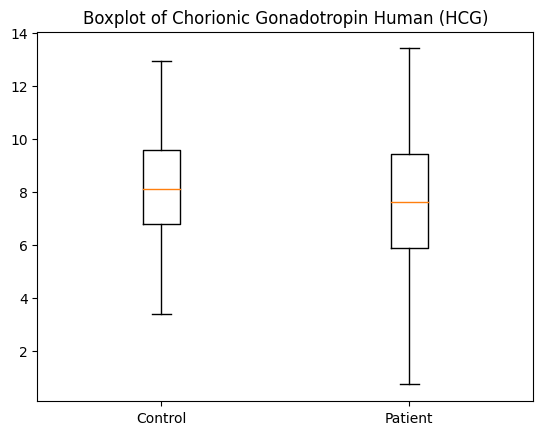

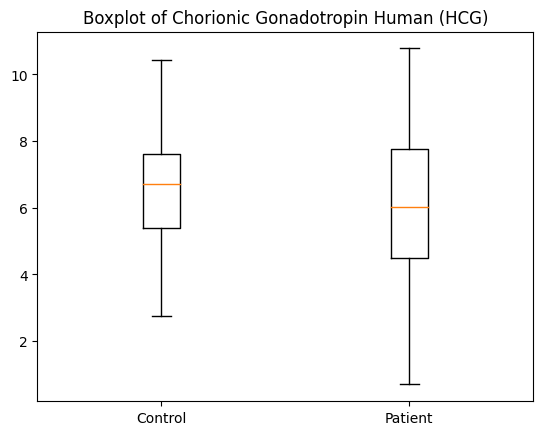

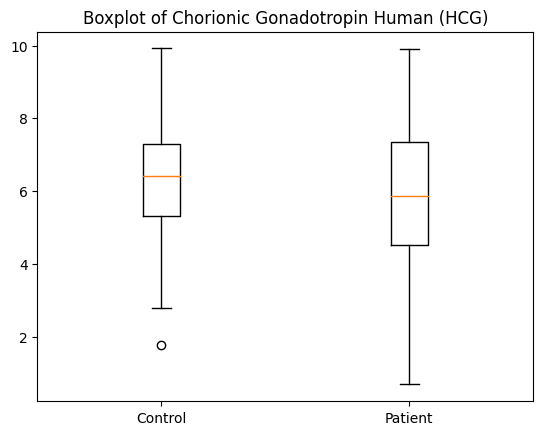

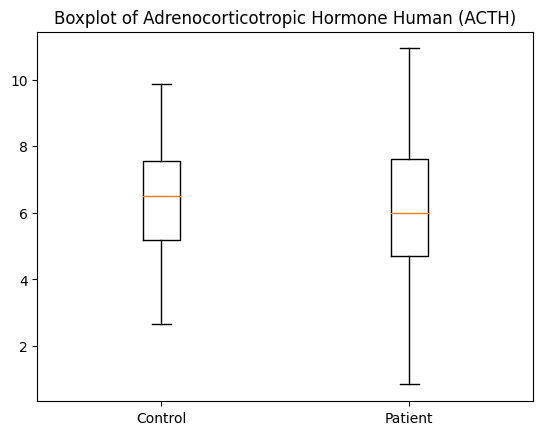

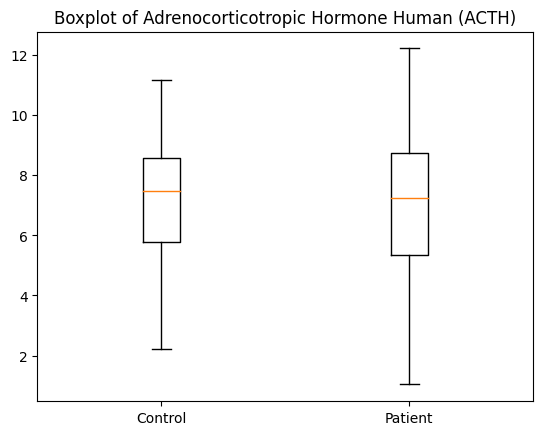

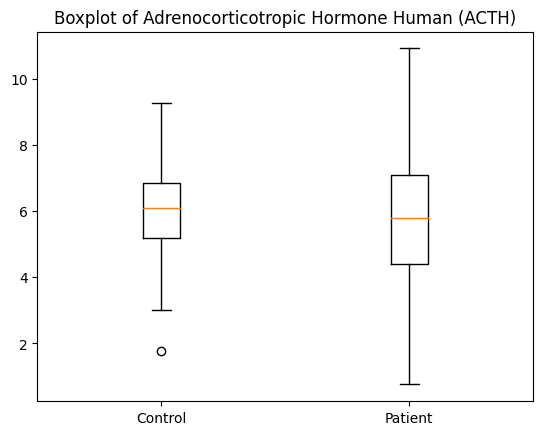

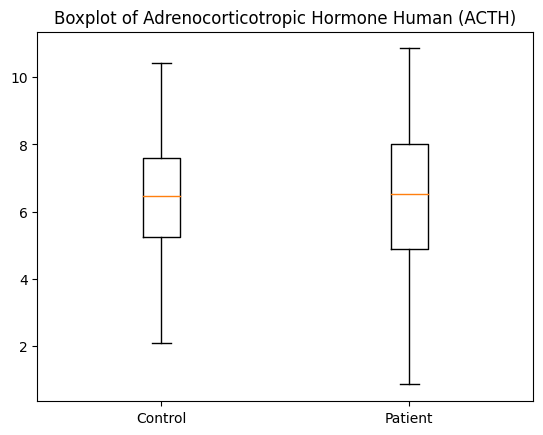

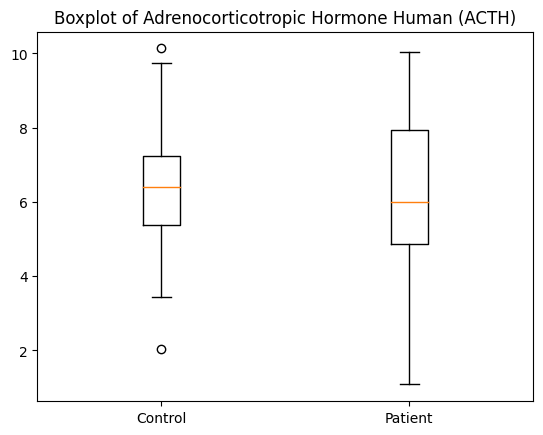

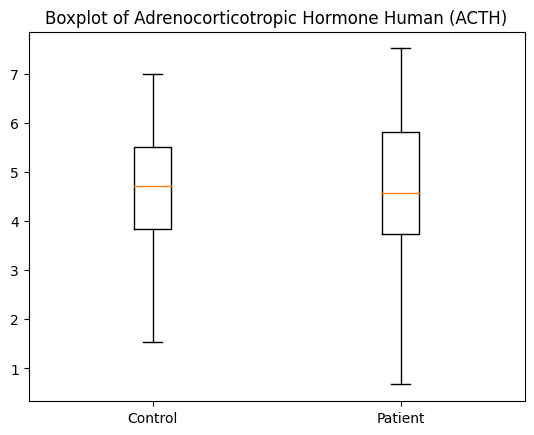

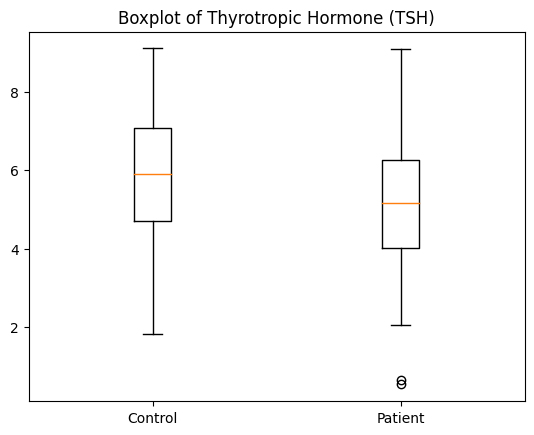

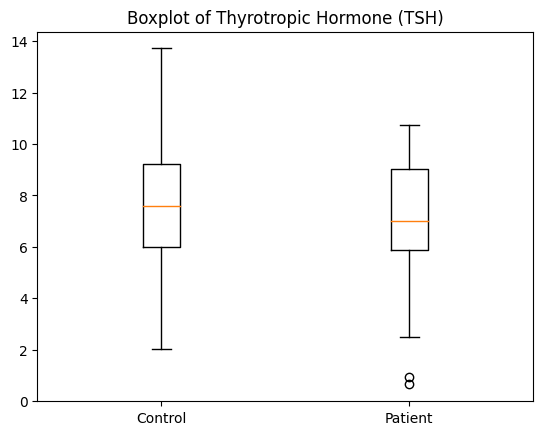

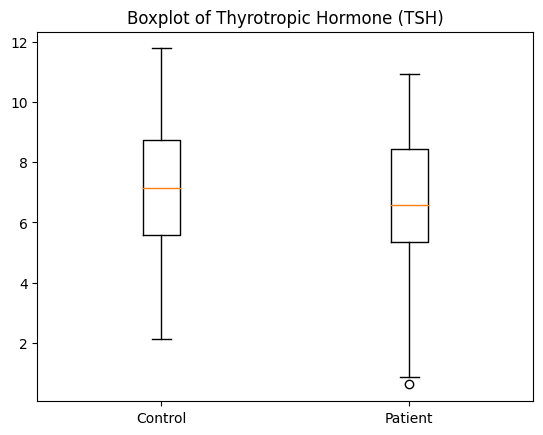

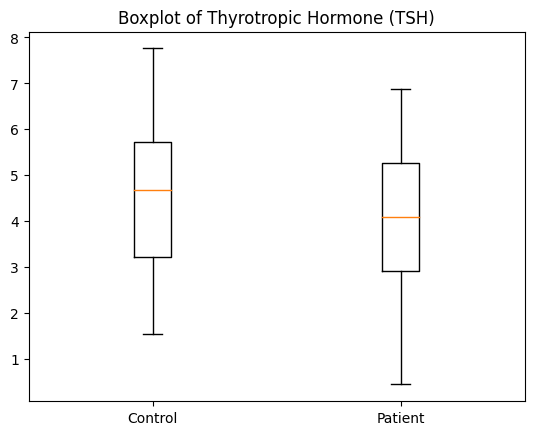

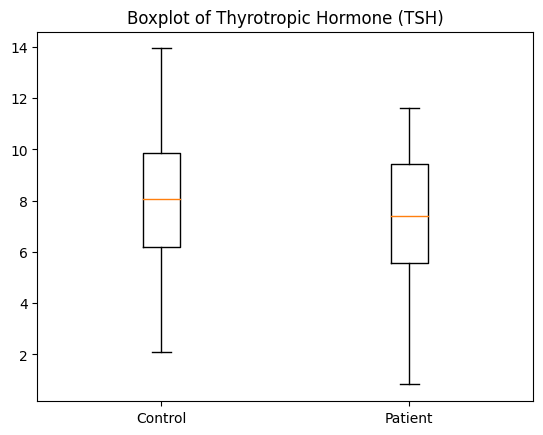

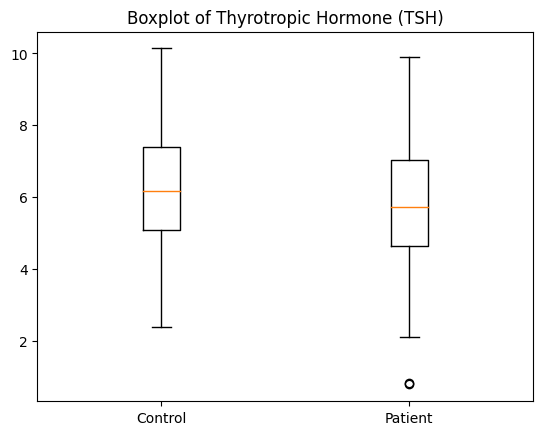

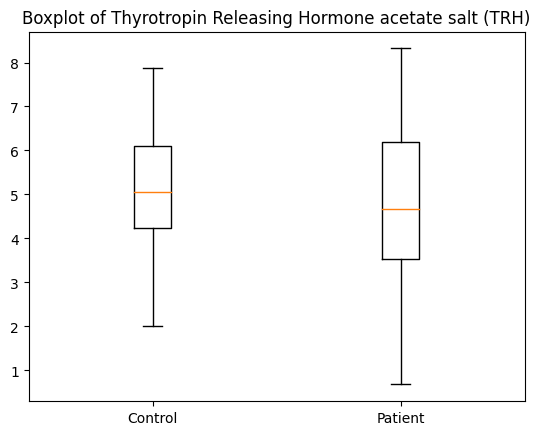

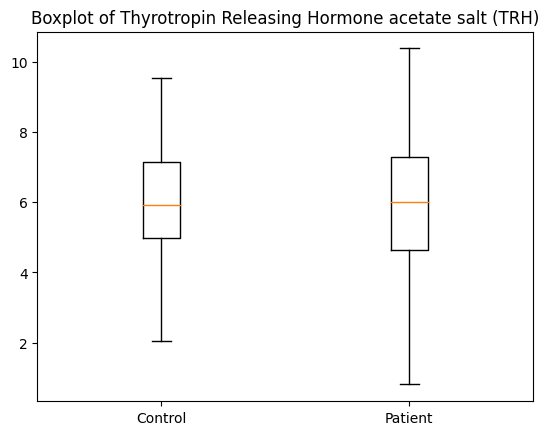

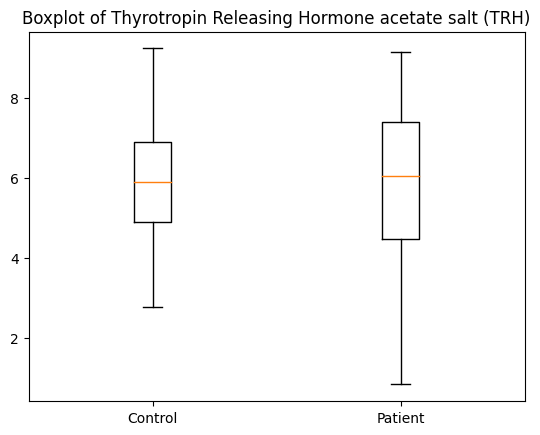

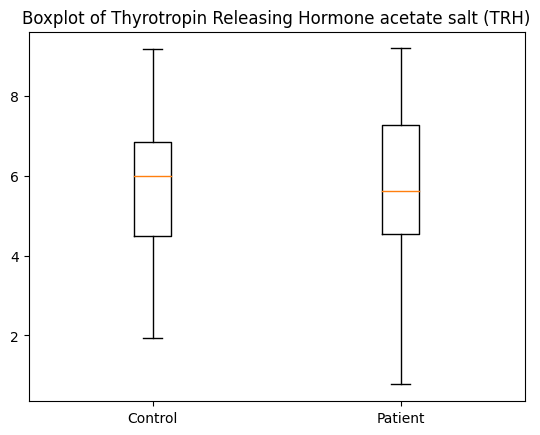

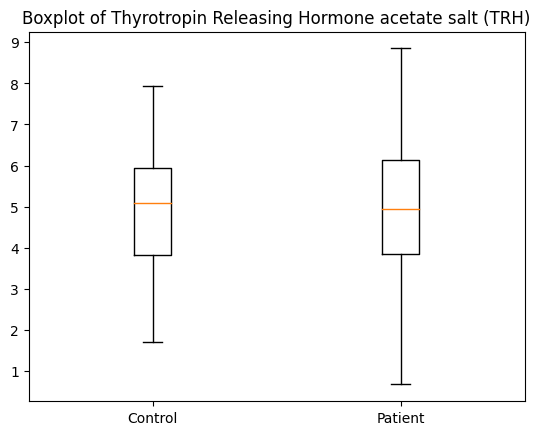

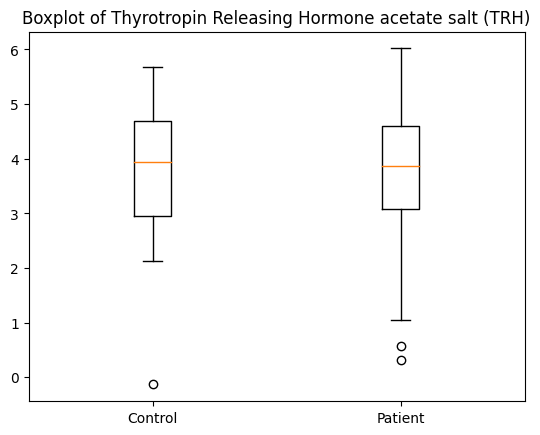

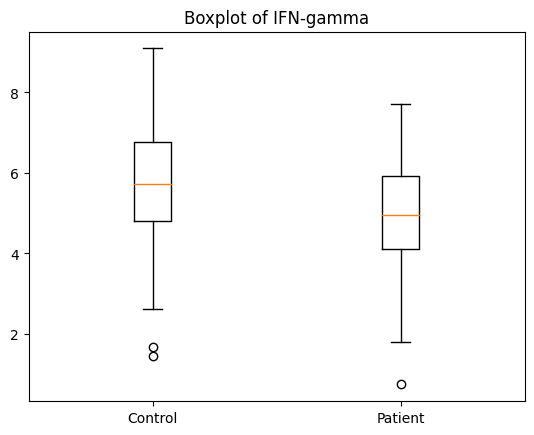

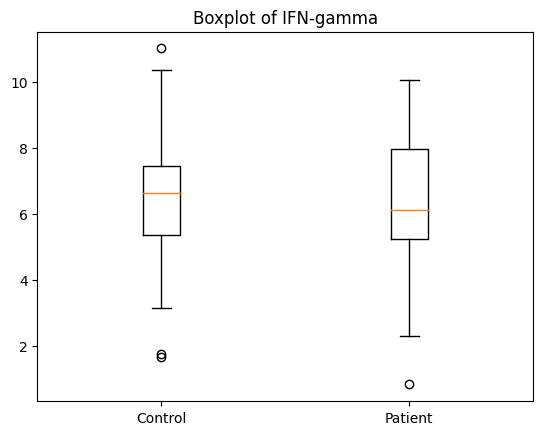

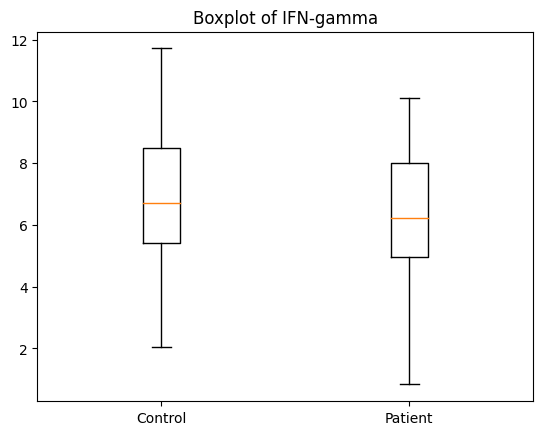

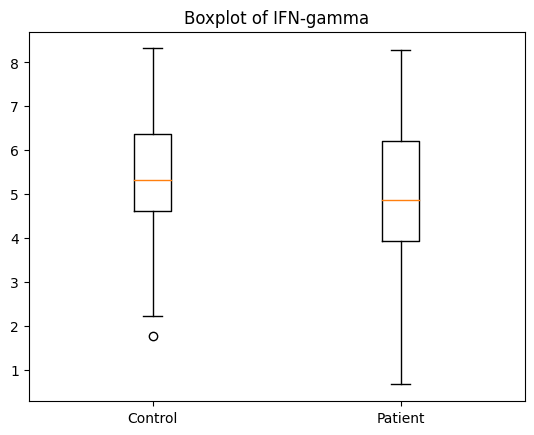

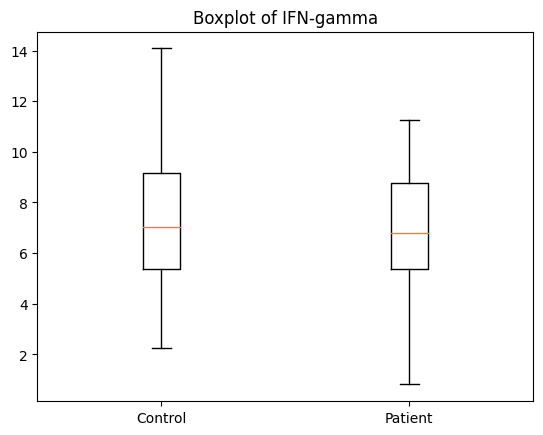

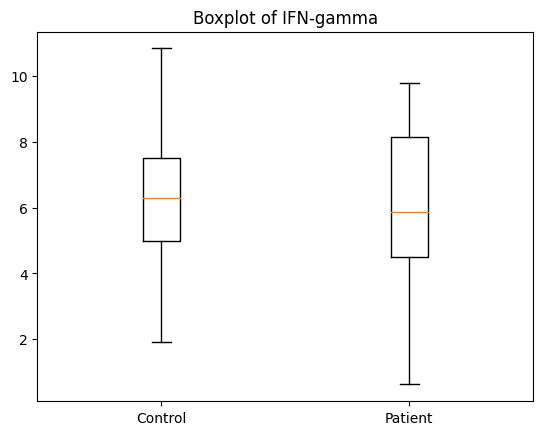

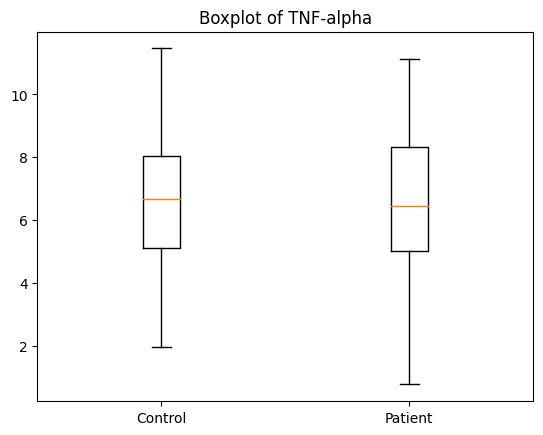

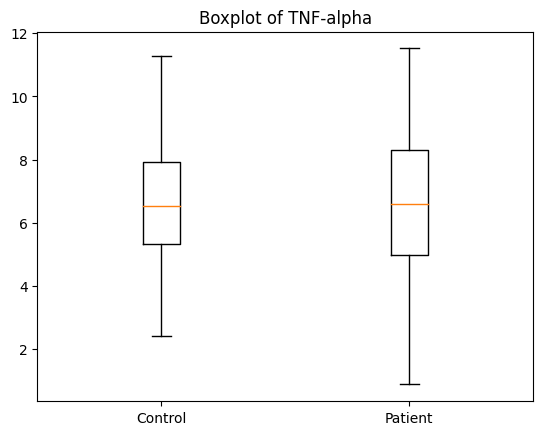

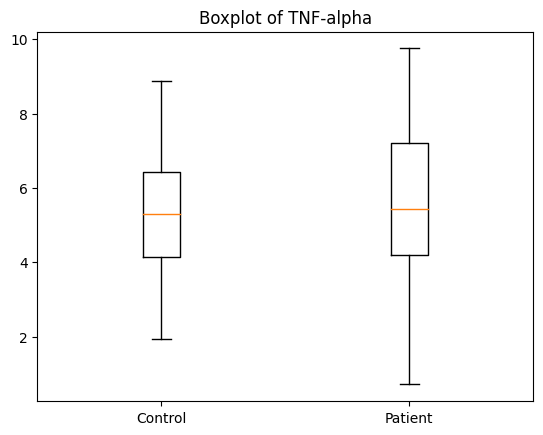

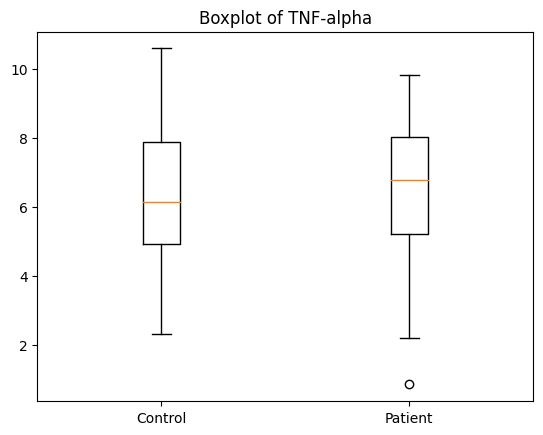

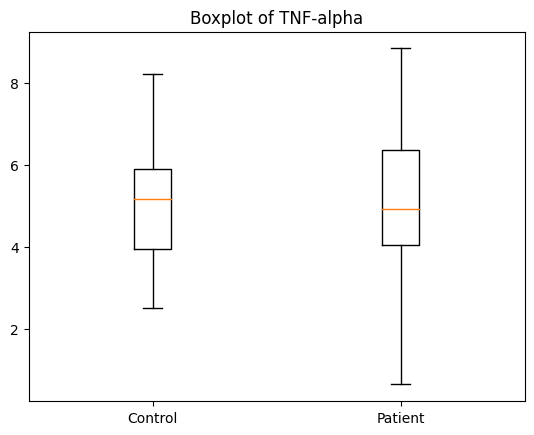

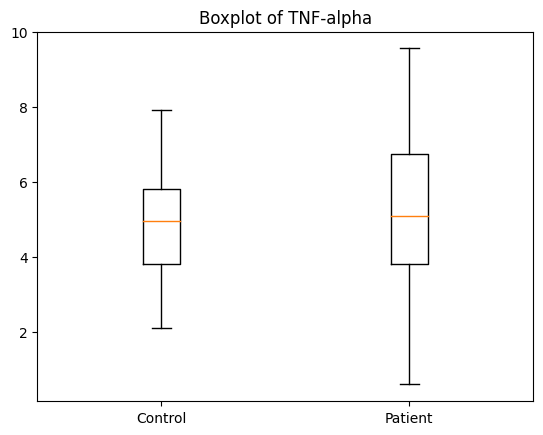

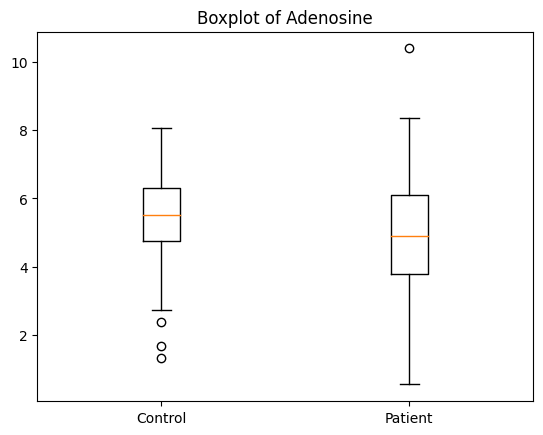

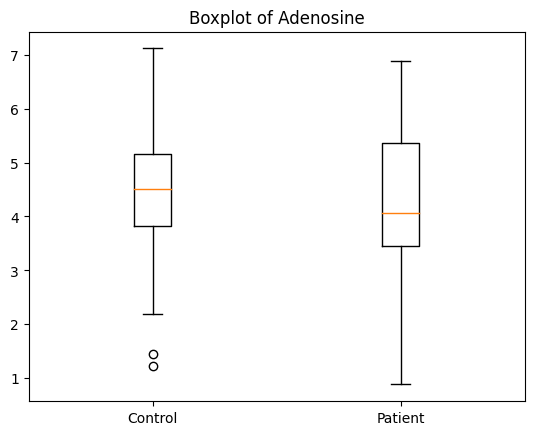

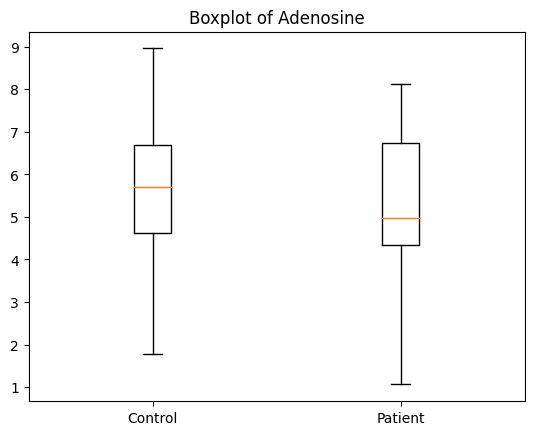

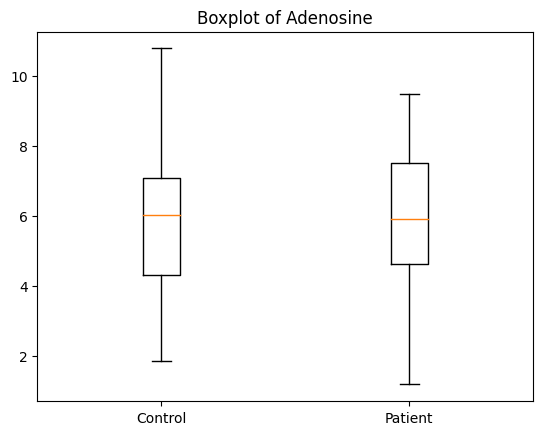

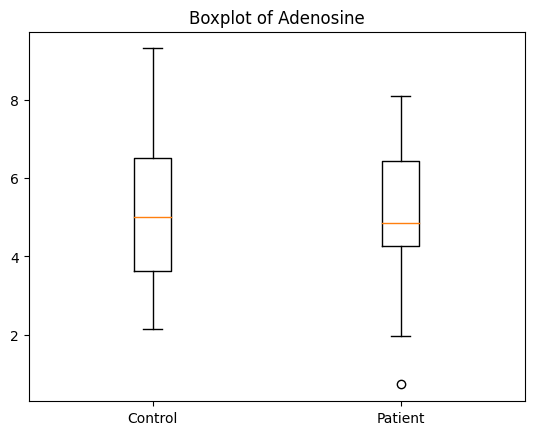

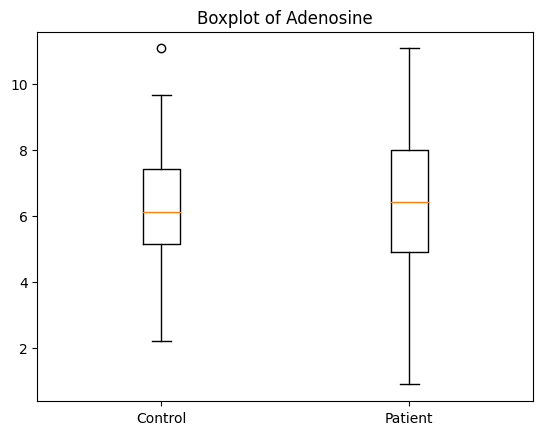

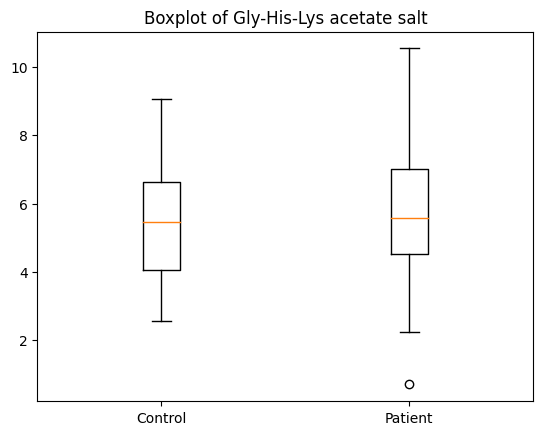

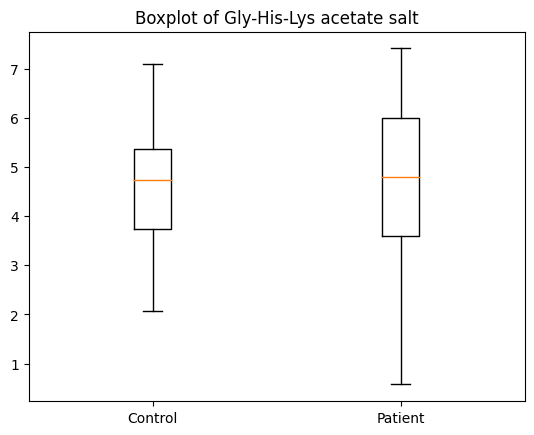

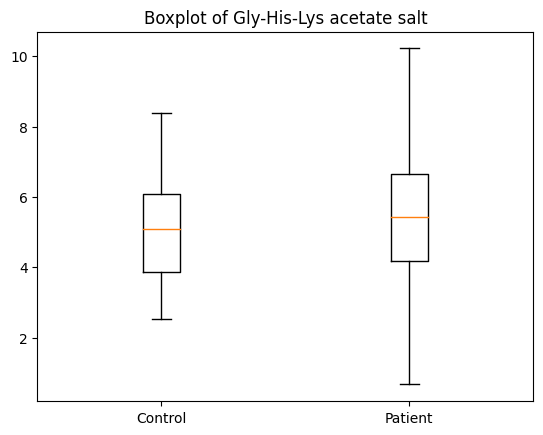

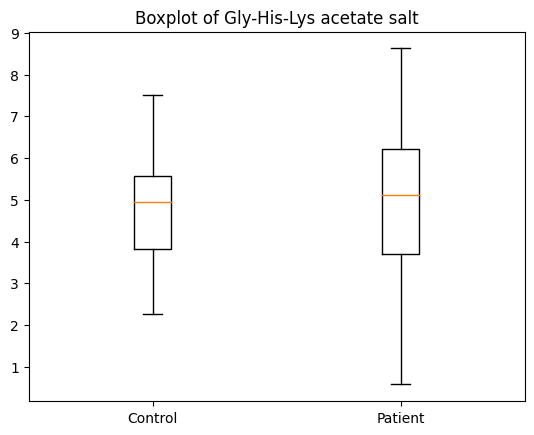

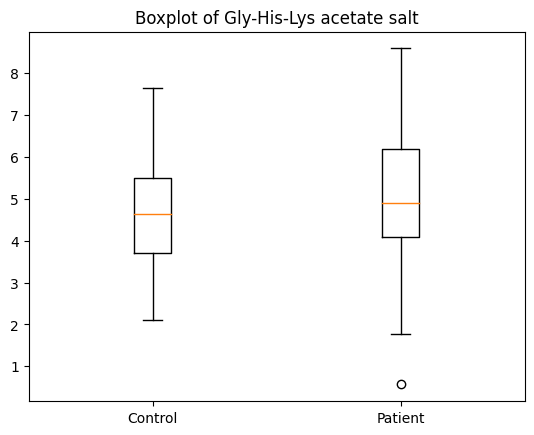

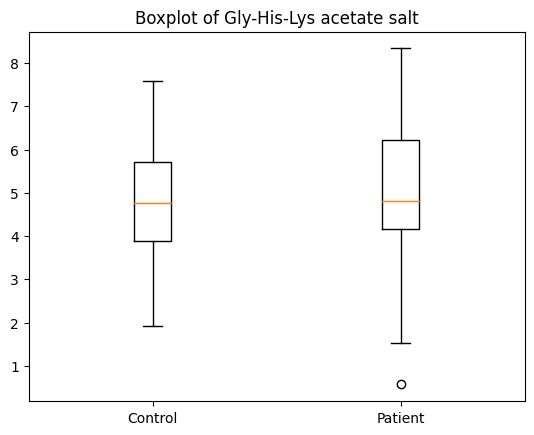

In [16]:
#Creates a list of 2 sets of boxplots that compare the patient and control data side by side
plotList = []
for i in range(0, 96):
    fig, ax = plt.subplots()
    toPlot = []
    toPlot.append(arrayControl[i])
    toPlot.append(arrayPatient[i])
    ax.boxplot(toPlot)
    ax.set_xticklabels(["Control", "Patient"])
    ax.set_title("Boxplot of " + dfNames[i+2])

    plotList.append(fig)

#Saves the boxplots in a pdf
pdf = PdfPages("PM-M8 Boxplot.pdf")  #create a pdf document
for plot in plotList:
    pdf.savefig(plot, orientation="landscape")  #save plot to pdfs
pdf.close()